In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('max_columns', 100)
pd.set_option('max_rows', 100)

In [3]:
os.getcwd()

'/Users/alvastrand/Documents/OU/Research/notebooks'

In [4]:
path = '/Users/alvastrand/'
os.chdir(path)

In [5]:
os.getcwd()

'/Users/alvastrand'

In [6]:
filename = 'zerofilled_blocks_20200318.csv'
df = pd.read_csv(filename)

/Users/alvastrand/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
df['species_observed'].value_counts()

False    116176
True        141
Name: species_observed, dtype: int64

In [8]:
df['species_observed_binary_values'] = np.where(df['species_observed'] == True, 1.0, 0.0)

In [9]:
df.shape

(116317, 36)

In [10]:
df.head(2)

,checklist_id,last_edited_date,country,country_code,state,state_code,county,county_code,iba_code,bcr_code,usfws_code,atlas_block,locality,locality_id,locality_type,latitude,longitude,observation_date,time_observations_started,observer_id,sampling_event_identifier,protocol_type,protocol_code,project_code,duration_minutes,effort_distance_km,effort_area_ha,number_observers,all_species_reported,group_identifier,trip_comments,scientific_name,observation_count,species_observed,gridcell,species_observed_binary_values
0,S5759385,2013-10-31 15:14:54,United States,US,South Carolina,US-SC,Beaufort,US-SC-013,NaN,27.0,NaN,NaN,Port Royal,L495541,T,32.379100,-80.692630,2010-01-13,09:30:00,obs129723,S5759385,Traveling,P22,EBIRD,80.0,0.966,NaN,1.0,True,NaN,A brief visit to Sands Landing and vicinity on...,Hirundo rustica,0,False,E7,0.0
1,S5791667,2010-03-22 16:54:10,United States,US,Texas,US-TX,Travis,US-TX-453,NaN,21.0,NaN,NaN,Walnut Creek WWTP,L498572,H,30.281565,-97.652063,2010-01-21,15:45:00,obs199682,S5791667,Traveling,P22,EBIRD,30.0,1.609,NaN,2.0,True,NaN,NaN,Hirundo rustica,0,False,NaN,0.0


In [11]:
# Calculate the total number of checklists for each grid cell and date
df_cnt = df[['checklist_id', 'gridcell', 'observation_date']].groupby(['gridcell', 'observation_date']).count()

In [12]:
df_cnt.rename(columns={'checklist_id': 'nb_of_checklists'}, inplace=True)

In [13]:
df_cnt.shape

(4734, 1)

In [14]:
df_cnt.head(2)

nb_of_checklists
gridcell observation_date                  
A6       2010-01-02                       4
         2010-01-05                       2

In [15]:
# df_cp = df.copy()
# df_cp = df_cp[df_cp['observation_count'] != 'X']
# df_cp['observation_count'] = df_cp['observation_count'].astype(int)

In [16]:
# Calculate the number of checklists with at least one Barn Swallow observation for each grid cell and date
df_sum = df[['species_observed_binary_values', 'gridcell', 'observation_date']].groupby(['gridcell', 
                                                                                         'observation_date']).sum()

In [17]:
df_sum.rename(columns={'species_observed_binary_values': 'nb_of_checklists_species'}, inplace=True)

In [18]:
df_sum.shape

(4734, 1)

In [19]:
df_sum.head(2)

nb_of_checklists_species
gridcell observation_date                          
A6       2010-01-02                             0.0
         2010-01-05                             0.0

In [20]:
df_grp = df_cnt.merge(df_sum, left_index=True, right_index=True)

In [21]:
df_grp.shape

(4734, 2)

In [22]:
df_grp.head(2)

nb_of_checklists  nb_of_checklists_species
gridcell observation_date                                            
A6       2010-01-02                       4                       0.0
         2010-01-05                       2                       0.0

In [23]:
# Calculate the proportion of checklists with at least one Barn Swallow observation for each grid cell and date
df_grp['prop'] = df_grp['nb_of_checklists_species']/df_grp['nb_of_checklists']

In [24]:
df_grp.reset_index(inplace=True)

In [25]:
df_grp.shape

(4734, 5)

In [26]:
df_grp.head(2)

,gridcell,observation_date,nb_of_checklists,nb_of_checklists_species,prop
0,A6,2010-01-02,4,0.0,0.0
1,A6,2010-01-05,2,0.0,0.0


In [27]:
print(len(df_grp[df_grp['prop'] == 0]))
print(len(df_grp[df_grp['prop'] > 0]))

4727
7


In [28]:
len(df_grp['gridcell'].unique())

96

In [29]:
df_grp[df_grp['prop'] > 0]['gridcell']

118     B7
151     B7
223     C6
257     C7
271     C7
627     D6
3033    I9
Name: gridcell, dtype: object

In [30]:
df_grp['observation_date_dt'] = pd.to_datetime(df_grp['observation_date'])

In [31]:
df_grp.shape

(4734, 6)

In [32]:
df_grp.head(2)

,gridcell,observation_date,nb_of_checklists,nb_of_checklists_species,prop,observation_date_dt
0,A6,2010-01-02,4,0.0,0.0,2010-01-02
1,A6,2010-01-05,2,0.0,0.0,2010-01-05


In [33]:
grid_cell = 'B7'

In [34]:
# plt.scatter(df_grp[df_grp['gridcell'] == grid_cell]['observation_date_dt'], df_grp[df_grp['gridcell'] == 
#                                                                                    grid_cell]['prop'])
# plt.show()

In [35]:
# plt.rcParams["figure.figsize"]

/Users/alvastrand/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


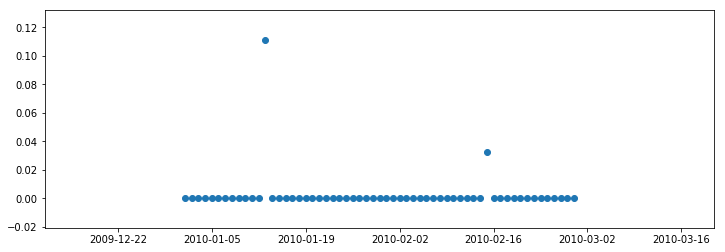

In [36]:
plt.figure(figsize=(12.0, 4.0))
plt.scatter(df_grp[df_grp['gridcell'] == grid_cell]['observation_date_dt'], df_grp[df_grp['gridcell'] == 
                                                                                   grid_cell]['prop'])
plt.show()

In [37]:
# plt.rcParams["figure.figsize"]

In [38]:
# df_grp[df_grp['gridcell'] == 'B7'].plot(x='observation_date_dt', y='prop', kind='scatter')
# plt.show()

In [39]:
filename = 'zerofilled_blocks_prop.csv'
df_grp.to_csv(filename, index=False)